In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [3]:
swandlondon_pca = pd.read_csv('output_new/pcascore_analysis_new.csv')

In [4]:
swandlondon_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   int64  
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
 11  MSOA11NM                     1211 non-null   object 
 12  LAD11CD                      1211 non-null   object 
 13  LAD11NM           

In [5]:
cor1=swandlondon_pca.iloc[:,[0,9,10,20,21,16,17,18,19,23]].copy()

In [6]:
cor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSOA11CD       1211 non-null   object 
 1   Score_2001     1211 non-null   float64
 2   Score_2011     1211 non-null   float64
 3   score_chg      1211 non-null   float64
 4   score_z_score  1211 non-null   float64
 5   rank_2001      1211 non-null   float64
 6   rank_2011      1211 non-null   float64
 7   rank_chg       1211 non-null   float64
 8   rank_z_score   1211 non-null   float64
 9   status2        1211 non-null   object 
dtypes: float64(8), object(2)
memory usage: 94.7+ KB


In [7]:
swandlondon_core = pd.read_csv('output_new/swandlondon_core.csv')

In [8]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [9]:
cor2=swandlondon_core.iloc[:,[0,1,2,3,4,5,6,7,25,26]].copy()

In [10]:
cor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   MSOA11NM                    1211 non-null   object 
 2   LAD11CD                     1211 non-null   object 
 3   LAD11NM                     1211 non-null   object 
 4   RGN11CD                     1211 non-null   object 
 5   RGN11NM                     1211 non-null   object 
 6   MSOA01CD                    1211 non-null   object 
 7   MSOA01NM                    1211 non-null   object 
 8   ratio_la_space_vacant_2001  1211 non-null   float64
 9   ratio_la_space_vacant_2011  1211 non-null   float64
dtypes: float64(2), object(8)
memory usage: 94.7+ KB


In [11]:
cor = cor1.merge(cor2, on='MSOA11CD', how='left')

In [12]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   Score_2001                  1211 non-null   float64
 2   Score_2011                  1211 non-null   float64
 3   score_chg                   1211 non-null   float64
 4   score_z_score               1211 non-null   float64
 5   rank_2001                   1211 non-null   float64
 6   rank_2011                   1211 non-null   float64
 7   rank_chg                    1211 non-null   float64
 8   rank_z_score                1211 non-null   float64
 9   status2                     1211 non-null   object 
 10  MSOA11NM                    1211 non-null   object 
 11  LAD11CD                     1211 non-null   object 
 12  LAD11NM                     1211 non-null   object 
 13  RGN11CD                     1211 

In [13]:
cor['ratio_space_vacant_chg'] = (cor['ratio_la_space_vacant_2011'] - cor['ratio_la_space_vacant_2001'])

In [14]:
asc=cor[cor["status2"] == "ASC"].copy()
notasc=cor[(cor["status2"] == "DEC") | (cor["status2"] =="STB")].copy()

In [15]:
asc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 6 to 1210
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    177 non-null    object 
 1   Score_2001                  177 non-null    float64
 2   Score_2011                  177 non-null    float64
 3   score_chg                   177 non-null    float64
 4   score_z_score               177 non-null    float64
 5   rank_2001                   177 non-null    float64
 6   rank_2011                   177 non-null    float64
 7   rank_chg                    177 non-null    float64
 8   rank_z_score                177 non-null    float64
 9   status2                     177 non-null    object 
 10  MSOA11NM                    177 non-null    object 
 11  LAD11CD                     177 non-null    object 
 12  LAD11NM                     177 non-null    object 
 13  RGN11CD                     177 no

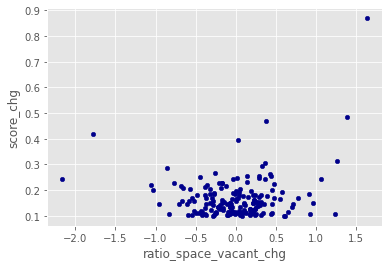

In [16]:
asc_cor=asc[['ratio_space_vacant_chg', 'score_chg']]
asc_cor.plot.scatter(x='ratio_space_vacant_chg',y='score_chg', c='DarkBlue')
plt.savefig('plot/p1-cor-asc.png',dpi = 200,bbox_inches = 'tight')

array([[<AxesSubplot:title={'center':'score_chg'}>]], dtype=object)

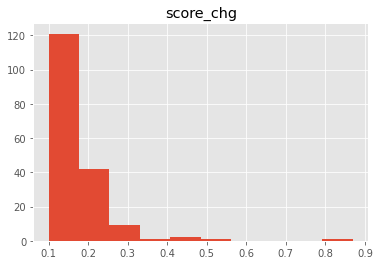

In [17]:
asc_cor.hist(column='score_chg')

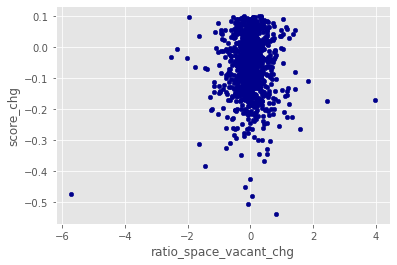

In [18]:
notasc_cor=notasc[['ratio_space_vacant_chg', 'score_chg']]
notasc_cor.plot.scatter(x='ratio_space_vacant_chg',y='score_chg', c='DarkBlue')
plt.savefig('plot/p1-cor-nonasc.png',dpi = 200,bbox_inches = 'tight')

In [19]:
from scipy import stats

In [20]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(asc['score_chg'], asc['ratio_space_vacant_chg'])

In [21]:
print(rho)
print(p)

0.022928533093263623
0.7619486772509795


In [22]:
rho2, p2 = stats.spearmanr(notasc['score_chg'], notasc['ratio_space_vacant_chg'])

In [23]:
print(rho2)
print(p2)

0.023960108340226778
0.4415154275431481


In [24]:
rho2, p2 = stats.spearmanr(cor['score_chg'], cor['ratio_space_vacant_chg'])
print(rho2)
print(p2)

0.022620361277926455
0.4315961198045005
